<a href="https://colab.research.google.com/github/jonthnli/stats507-coursework/blob/main/Stats_507_Final_Project_ACTUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change runtime type to GPU

In [ ]:
# STEP 1: install core libs

!pip install transformers torch arch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 39.3 MB/s eta 0:00:00


In [ ]:
# STEP 2: imports

import pandas as pd
import numpy as np
import torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# STEP 3: upload files from local -> Colab
# I pulled data from FactSet so I can't share publicly

from google.colab import files

uploaded = files.upload()

Saving Nvidia Price History (01-May-2025 to 28-Nov-2025)(Price History).csv to Nvidia Price History (01-May-2025 to 28-Nov-2025)(Price History).csv
Saving SPY Price History (01-May-2025 to 28-Nov-2025)(Price History).csv to SPY Price History (01-May-2025 to 28-Nov-2025)(Price History).csv
Saving Headlines (Nvidia, SPY) - 01-May-25 to 28-Nov-25(30-Nov-2025).csv to Headlines (Nvidia, SPY) - 01-May-25 to 28-Nov-25(30-Nov-2025).csv


In [ ]:
# STEP 4: load headline data

headline_path = "Headlines (Nvidia, SPY) - 01-May-25 to 28-Nov-25(30-Nov-2025).csv"

# FactSet export, usually fine with latin-1
df = pd.read_csv(headline_path, encoding="latin-1")

df.head()
df.columns

Index(['Date/Time', 'Identifier(s)', 'Headline', 'Source'], dtype='object')

In [ ]:
# STEP 5: clean headline df + split tickers

# parse datetime; let pandas guess format
df["datetime"] = pd.to_datetime(df["Date/Time"], errors="coerce")
df["date"] = df["datetime"].dt.date

# ensure identifiers are strings
df["Identifier(s)"] = df["Identifier(s)"].astype(str)

# filter by ticker (headlines can belong to both)
df_nvda = df[df["Identifier(s)"].str.contains("NVDA", na=False)].copy()
df_spy  = df[df["Identifier(s)"].str.contains("SPY",  na=False)].copy()

print("n_nvda_headlines:", len(df_nvda))
print("n_spy_headlines:", len(df_spy))

df_nvda.head()

/tmp/ipython-input-2652360433.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["Date/Time"], errors="coerce")


n_nvda_headlines: 13216
n_spy_headlines: 582


,Date/Time,Identifier(s),Headline,Source,datetime,date
2,14:01 28 Nov '25,"NVDA-US,ORCLE-US,067JCF-E,0DFHTG-E,0DM52V-E",Indexes Rise Weekly Amid Improved Odds For an ...,NEWS_MTNA,2025-11-28 14:01:00,2025-11-28
3,13:30 28 Nov '25,"BBY-US,BURL-US,DELL-US,DKS-US,GOOGL-US,HPQ-US,...",FactSet Podcast - Weekly Market Recap,SA,2025-11-28 13:30:00,2025-11-28
4,13:23 28 Nov '25,"AMZN-US,CME-US,COST-US,GME-US,GOOGL-US,M-US,NA...",DJ MÄRKTE USA/Anleger nach der Feiertagspause ...,DJGB,2025-11-28 13:23:00,2025-11-28
8,11:47 28 Nov '25,"CEG-US,GEV-US,KEY-US,NRG-US,NVDA-US,SIEB-US,VS...",Why U.S. utility stocks are falling after the ...,KRT,2025-11-28 11:47:00,2025-11-28
9,10:17 28 Nov '25,NVDA-US,TradingView - $NVDA: Wave 2 correction in place,NEWS_FNS,2025-11-28 10:17:00,2025-11-28


In [ ]:
# STEP 6: load FinBERT on GPU if available

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
model.to(device)
model.eval()


device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# STEP 7: FinBERT utils

def finbert_batch(texts, batch_size=32, max_length=64):
    """
    texts -> (N, 3) probs [pos, neg, neu]
    """
    all_probs = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]

        inputs = tokenizer(
            batch,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=max_length,
        )
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            logits = model(**inputs).logits

        probs = torch.softmax(logits.cpu(), dim=1).numpy()
        all_probs.append(probs)

    return np.vstack(all_probs)


def score_headline_df(df_x):
    """
    add FinBERT scores -> p_pos, p_neg, p_neu, sent_score
    """
    out = df_x.copy()
    texts = out["Headline"].fillna("").tolist()

    probs = finbert_batch(texts)

    out["p_pos"] = probs[:, 0]
    out["p_neg"] = probs[:, 1]
    out["p_neu"] = probs[:, 2]
    out["sent_score"] = out["p_pos"] - out["p_neg"]
    return out

In [ ]:
# STEP 8: score NVDA + SPY headlines
# THIS MIGHT TAKE A LONG TIME (especially if not running on GPU)

df_nvda_scored = score_headline_df(df_nvda)
df_spy_scored  = score_headline_df(df_spy)

df_nvda_scored.head()

,Date/Time,Identifier(s),Headline,Source,datetime,date,p_pos,p_neg,p_neu,sent_score
2,14:01 28 Nov '25,"NVDA-US,ORCLE-US,067JCF-E,0DFHTG-E,0DM52V-E",Indexes Rise Weekly Amid Improved Odds For an ...,NEWS_MTNA,2025-11-28 14:01:00,2025-11-28,0.890144,0.065826,0.044031,0.824318
3,13:30 28 Nov '25,"BBY-US,BURL-US,DELL-US,DKS-US,GOOGL-US,HPQ-US,...",FactSet Podcast - Weekly Market Recap,SA,2025-11-28 13:30:00,2025-11-28,0.028779,0.044626,0.926595,-0.015847
4,13:23 28 Nov '25,"AMZN-US,CME-US,COST-US,GME-US,GOOGL-US,M-US,NA...",DJ MÄRKTE USA/Anleger nach der Feiertagspause ...,DJGB,2025-11-28 13:23:00,2025-11-28,0.114774,0.025322,0.859903,0.089452
8,11:47 28 Nov '25,"CEG-US,GEV-US,KEY-US,NRG-US,NVDA-US,SIEB-US,VS...",Why U.S. utility stocks are falling after the ...,KRT,2025-11-28 11:47:00,2025-11-28,0.010349,0.949930,0.039721,-0.939582
9,10:17 28 Nov '25,NVDA-US,TradingView - $NVDA: Wave 2 correction in place,NEWS_FNS,2025-11-28 10:17:00,2025-11-28,0.127457,0.483400,0.389143,-0.355943


In [ ]:
# STEP 9: daily sentiment series per ticker

def make_daily_sentiment(df_scored, ticker_name):
    """
    input: scored df with 'date' + 'sent_score'
    output: daily mean sentiment + headline count
    """
    daily_mean = (
        df_scored.groupby("date")["sent_score"]
        .mean()
        .reset_index()
        .rename(columns={"sent_score": f"{ticker_name}_sent"})
    )

    daily_count = (
        df_scored.groupby("date")
        .size()
        .reset_index(name=f"{ticker_name}_n_headlines")
    )

    daily = daily_mean.merge(daily_count, on="date", how="left")
    return daily

daily_nvda = make_daily_sentiment(df_nvda_scored, "NVDA")
daily_spy  = make_daily_sentiment(df_spy_scored,  "SPY")

daily_nvda.head()

,date,NVDA_sent,NVDA_n_headlines
0,2025-05-01,0.185730,14
1,2025-05-02,0.287886,10
2,2025-05-05,-0.110192,9
3,2025-05-06,0.168159,8
4,2025-05-07,0.093388,13


In [ ]:
# STEP 10.NVDA: load price history + compute log returns

# NVDA
nvda_prices = pd.read_csv(
    "Nvidia Price History (01-May-2025 to 28-Nov-2025)(Price History).csv",
    header=2  # row with Date, Price, CVol, etc.
)
print("NVDA cols:", nvda_prices.columns)

nvda_prices = nvda_prices.rename(columns={"Price": "Close"})
nvda_prices["date"] = pd.to_datetime(nvda_prices["Date"]).dt.date
nvda_prices = nvda_prices.sort_values("date")

nvda_prices["return_NVDA"] = np.log(
    nvda_prices["Close"] / nvda_prices["Close"].shift(1)
)

nvda_prices.head()

NVDA cols: Index(['Date', 'Price', 'CVol', 'Change', '% Change', '% Return',
       'Total Return (Gross)', 'Cumulative Return %', 'Open', 'High', 'Low',
       'Cumulative Change %'],
      dtype='object')


/tmp/ipython-input-1396186111.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvda_prices["date"] = pd.to_datetime(nvda_prices["Date"]).dt.date


,Date,Close,CVol,Change,% Change,% Return,Total Return (Gross),Cumulative Return %,Open,High,Low,Cumulative Change %,date,return_NVDA
146,05/01/25,111.61,236121500,2.69,2.47,2.47,111.63,-19.26,113.08,114.94,111.30,-19.27,2025-05-01,NaN
145,05/02/25,114.50,190194800,2.89,2.59,2.59,114.52,-17.17,114.18,115.40,113.37,-17.18,2025-05-02,0.025564
144,05/05/25,113.82,133163200,-0.68,-0.59,-0.59,113.84,-17.66,112.91,114.67,112.66,-17.67,2025-05-05,-0.005957
143,05/06/25,113.54,158525600,-0.28,-0.25,-0.25,113.56,-17.86,111.48,114.74,110.82,-17.87,2025-05-06,-0.002463
142,05/07/25,117.06,207827810,3.52,3.10,3.10,117.08,-15.31,113.05,117.68,112.28,-15.33,2025-05-07,0.030531


In [ ]:
# STEP 10.SPY

# SPY
spy_prices = pd.read_csv(
    "SPY Price History (01-May-2025 to 28-Nov-2025)(Price History).csv",
    header=2
)
print("SPY cols:", spy_prices.columns)

spy_prices = spy_prices.rename(columns={"Price": "Close"})
spy_prices["date"] = pd.to_datetime(spy_prices["Date"]).dt.date
spy_prices = spy_prices.sort_values("date")

spy_prices["return_SPY"] = np.log(
    spy_prices["Close"] / spy_prices["Close"].shift(1)
)

spy_prices.head()

SPY cols: Index(['Date', 'Price', 'CVol', '% Change', 'Open', 'Low', 'High', 'NAV',
       'Total Return (Gross)', '% Return', 'Cumulative Return %'],
      dtype='object')


/tmp/ipython-input-2566575324.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spy_prices["date"] = pd.to_datetime(spy_prices["Date"]).dt.date


,Date,Close,CVol,% Change,Open,Low,High,NAV,Total Return (Gross),% Return,Cumulative Return %,date,return_SPY
146,05/01/25,558.47,63186152,0.71,560.37,557.86,564.07,558.67,562.01,0.71,-6.73,2025-05-01,NaN
145,05/02/25,566.76,60717273,1.48,564.73,562.38,568.38,566.90,570.35,1.48,-5.34,2025-05-02,0.014735
144,05/05/25,563.51,38659220,-0.57,562.57,561.70,566.65,563.32,567.08,-0.57,-5.89,2025-05-05,-0.005751
143,05/06/25,558.80,48264710,-0.84,557.93,556.96,563.35,558.99,562.34,-0.84,-6.67,2025-05-06,-0.008393
142,05/07/25,561.15,55733230,0.42,560.15,556.04,563.82,561.42,564.71,0.42,-6.28,2025-05-07,0.004197


In [ ]:
# STEP 11: merge NVDA returns with NVDA + SPY sentiment

df_model = (
    nvda_prices[["date", "Close", "return_NVDA"]]
    .merge(daily_nvda, on="date", how="left")
    .merge(daily_spy,  on="date", how="left")
)

df_model.head()
df_model.describe()

,Close,return_NVDA,NVDA_sent,NVDA_n_headlines,SPY_sent,SPY_n_headlines
count,147.000000,146.000000,147.000000,147.000000,147.000000,147.000000
mean,167.650884,0.003158,0.126720,81.476190,0.027814,3.537415
std,22.302979,0.020865,0.140766,75.250662,0.417665,1.733127
min,111.610000,-0.050100,-0.289683,3.000000,-0.902874,1.000000
25%,150.600000,-0.008079,0.050872,22.000000,-0.248752,3.000000
50%,176.240000,0.003059,0.140850,59.000000,0.007888,3.000000
75%,182.015000,0.017152,0.223899,119.500000,0.353205,4.000000
max,207.040000,0.056317,0.575372,493.000000,0.874994,9.000000


In [ ]:
# STEP 12 (OPTIONAL): save final modeling df -> CSV

out_path = "nvda_modeling_dataset.csv"
df_model.to_csv(out_path, index=False)

print("saved:", out_path)

from google.colab import files
files.download(out_path)

saved: nvda_modeling_dataset.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We now move into the GARCH stuff...

In [ ]:
# STEP 13: prep data for GARCH

import matplotlib.pyplot as plt
from arch import arch_model

vol_df = df_model.copy()

# returns as % for GARCH
returns = vol_df["return_NVDA"] * 100

# keep sentiment
vol_df["NVDA_sent_c"] = vol_df["NVDA_sent"] - vol_df["NVDA_sent"].mean()
vol_df["SPY_sent_c"]  = vol_df["SPY_sent"]  - vol_df["SPY_sent"].mean()

vol_df.head()

,date,Close,return_NVDA,NVDA_sent,NVDA_n_headlines,SPY_sent,SPY_n_headlines,NVDA_sent_c,SPY_sent_c
0,2025-05-01,111.61,NaN,0.185730,14,0.418410,3,0.059010,0.390596
1,2025-05-02,114.50,0.025564,0.287886,10,0.425122,3,0.161166,0.397308
2,2025-05-05,113.82,-0.005957,-0.110192,9,-0.300918,3,-0.236912,-0.328732
3,2025-05-06,113.54,-0.002463,0.168159,8,-0.576583,3,0.041439,-0.604397
4,2025-05-07,117.06,0.030531,0.093388,13,0.394552,3,-0.033332,0.366738


In [ ]:
# STEP 14: baseline GARCH(1,1) w/o sentiment

# FIRST GOTTA CLEAN... Cleaned return series for GARCH input

returns = df_model["return_NVDA"] * 100 # df_model is the merged dataset

# convert to numeric
returns = pd.to_numeric(returns, errors="coerce")

# drop inf/nan
returns = returns.replace([np.inf, -np.inf], np.nan)
returns = returns.dropna()

# remove zero or nearly-zero returns (causes GARCH fail)
returns = returns[returns.abs() > 1e-12]

# clip extreme values (rare, but good practice)
returns = returns.clip(lower=-50, upper=50)

print("GARCH usable length:", len(returns))
print(returns.describe())

garch_vol = arch_model(
    returns,
    mean="Constant", # mean is not focus; vol is
    vol="GARCH",
    p=1,
    q=1,
    dist="normal"
)

res_garch = garch_vol.fit(update_freq=10, disp="off")
print(res_garch.summary())

GARCH usable length: 146
count    146.000000
mean       0.315849
std        2.086547
min       -5.009964
25%       -0.807869
50%        0.305889
75%        1.715173
max        5.631653
Name: return_NVDA, dtype: float64
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            return_NVDA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -312.413
Distribution:                  Normal   AIC:                           632.825
Method:            Maximum Likelihood   BIC:                           644.760
                                        No. Observations:                  146
Date:                Mon, Dec 01 2025   Df Residuals:                      145
Time:                        18:08:15   Df Model:                            1
                                 Mean Model                           

In [ ]:
# STEP 15: get conditional volatility (sigma_t)

vol_df["sigma_t"] = res_garch.conditional_volatility # this is our volatility measure
vol_df["log_sigma_t"] = np.log(vol_df["sigma_t"])

vol_df[["date", "sigma_t", "log_sigma_t"]].head()

,date,sigma_t,log_sigma_t
0,2025-05-01,NaN,NaN
1,2025-05-02,2.148237,0.764648
2,2025-05-05,2.133487,0.757758
3,2025-05-06,1.965810,0.675904
4,2025-05-07,1.886032,0.634475


In [ ]:
# ORIGINALLY EXPERIENCED ALL NAN UPON RUNNING STEP 16

#print("1) Any NaN in sigma_t?:", vol_df["sigma_t"].isna().sum(), "out of", len(vol_df))
#print("2) Any NaN in log_sigma_t?:", vol_df["log_sigma_t"].isna().sum())

#print("\n3) Any NaN in NVDA_sent?:", vol_df["NVDA_sent"].isna().sum())
#print("4) Any NaN in SPY_sent?:", vol_df["SPY_sent"].isna().sum())

#print("\n5) Show first 10 rows of relevant columns:")
#print(vol_df[["date", "sigma_t", "log_sigma_t", "NVDA_sent", "SPY_sent"]].head(10))

1) Any NaN in sigma_t?: 1 out of 147
2) Any NaN in log_sigma_t?: 1

3) Any NaN in NVDA_sent?: 0
4) Any NaN in SPY_sent?: 0

5) Show first 10 rows of relevant columns:
         date   sigma_t  log_sigma_t  NVDA_sent  SPY_sent
0  2025-05-01       NaN          NaN   0.185730  0.418410
1  2025-05-02  2.148237     0.764648   0.287886  0.425122
2  2025-05-05  2.133487     0.757758  -0.110192 -0.300918
3  2025-05-06  1.965810     0.675904   0.168159 -0.576583
4  2025-05-07  1.886032     0.634475   0.093388  0.394552
5  2025-05-08  2.139516     0.760580   0.189154  0.354494
6  2025-05-09  1.937407     0.661351  -0.230185 -0.700363
7  2025-05-12  1.897627     0.640604   0.210647  0.032308
8  2025-05-13  2.695040     0.991413   0.234648  0.210922
9  2025-05-14  2.962770     1.086125   0.257207  0.351915


In [ ]:
# STEP 16: OLS regression: log(sigma_t) ~ sentiment
import statsmodels.api as sm

# Drop NaN volatility rows (first row always NaN in GARCH)
vol_df = vol_df.dropna(subset=["sigma_t", "log_sigma_t"]).reset_index(drop=True)

X = vol_df[["NVDA_sent_c", "SPY_sent_c"]].copy()
X = sm.add_constant(X)
y = vol_df["log_sigma_t"]

vol_reg = sm.OLS(y, X).fit()
print(vol_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            log_sigma_t   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.111
Date:                Mon, 01 Dec 2025   Prob (F-statistic):              0.125
Time:                        18:18:24   Log-Likelihood:                 123.21
No. Observations:                 146   AIC:                            -240.4
Df Residuals:                     143   BIC:                            -231.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7212      0.009     82.882      

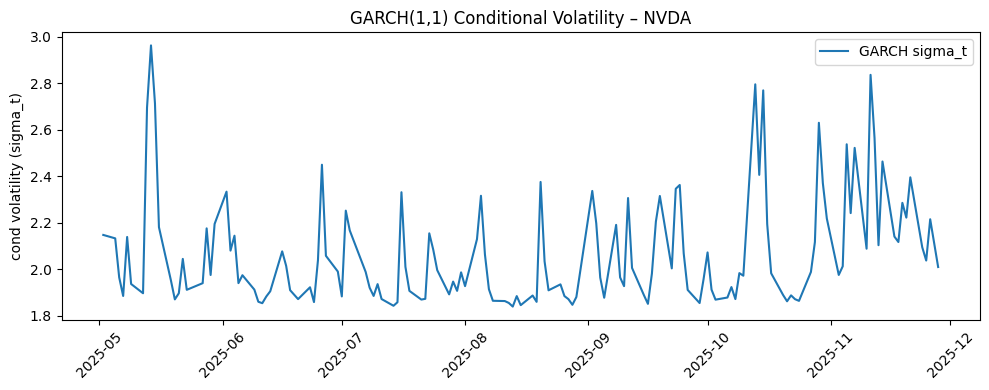

In [ ]:
# STEP 17: plot GARCH volatility over time

plt.figure(figsize=(10,4))
plt.plot(vol_df["date"], vol_df["sigma_t"], label="GARCH sigma_t")
plt.xticks(rotation=45)
plt.ylabel("cond volatility (sigma_t)")
plt.title("GARCH(1,1) Conditional Volatility – NVDA")
plt.legend()
plt.tight_layout()
plt.show()

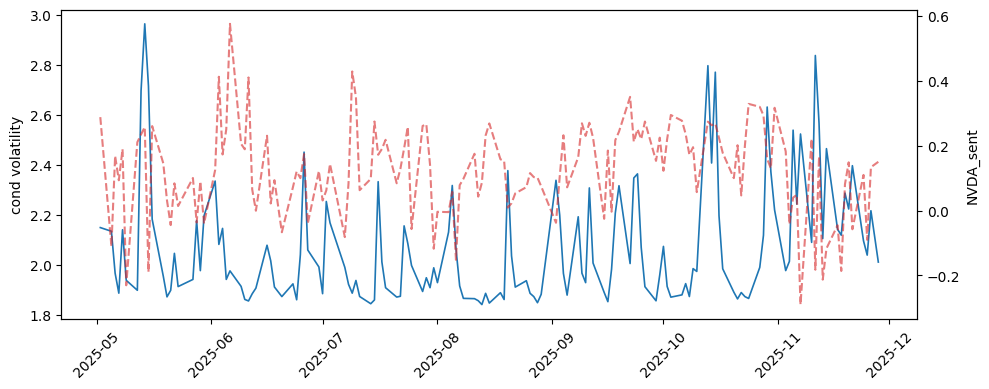

In [ ]:
# STEP 18: overlay sigma_t and NVDA_sent

fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(vol_df["date"], vol_df["sigma_t"], label="sigma_t", linewidth=1.2)
ax1.set_ylabel("cond volatility")
ax1.tick_params(axis="x", rotation=45)

ax2 = ax1.twinx()
ax2.plot(vol_df["date"], vol_df["NVDA_sent"], linestyle="--", alpha=0.6, label="NVDA_sent", color="tab:red")
ax2.set_ylabel("NVDA_sent")

fig.tight_layout()
plt.show()

In [ ]:
# STEP 19: compare sentiment on high-vol vs low-vol days

median_sigma = vol_df["sigma_t"].median()
high_vol = vol_df[vol_df["sigma_t"] > median_sigma]
low_vol  = vol_df[vol_df["sigma_t"] <= median_sigma]

print("NVDA_sent (low vol) mean:", low_vol["NVDA_sent"].mean())
print("NVDA_sent (high vol) mean:", high_vol["NVDA_sent"].mean())

NVDA_sent (low vol) mean: 0.14837123
NVDA_sent (high vol) mean: 0.104260355
